<a href="https://colab.research.google.com/github/Thrishankkuntimaddi/Data-Structures-and-Algorithms-Advanced/blob/main/9%20-%20LinkedList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reverse First K Nodes

I/P : 10 -> 20 -> 30 -> 40 -> 50 -> 60 ; k = 3

O/P : 30 -> 20 -> 10 -> 60 -> 50 -> 40

I/P : 10 -> 20 -> 30 -> 40 -> 50 ; k = 3

O/P : 30 -> 20 -> 10 -> 50 -> 40

In [6]:
# Recursive Solution

class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def printList(head):
    curr = head
    while curr:
        print(curr.value, end=" -> ")
        curr = curr.next
    print("None")

def recRevK(head, k):
  curr = head
  prev, next = None, None
  count = 0

  while curr != None and count < k:
    next = curr.next
    curr.next = prev
    prev = curr
    curr = next
    count += 1

  if next != None:
    rem_head = recRevK(curr, k)
    head.next = rem_head

  return prev

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)


curr = head
new_head = recRevK(curr, 3)
printList(new_head)

3 -> 2 -> 1 -> 5 -> 4 -> None


In [7]:
# Iterative Solution

class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def iteRevK(head, k):
    curr = head
    prev_first = None
    first_pass = True

    while curr is not None:
        first, prev = curr, None
        count = 0

        while curr is not None and count < k:
            next_node = curr.next
            curr.next = prev
            prev = curr
            curr = next_node
            count += 1

        if first_pass:
            head = prev
            first_pass = False
        else:
            prev_first.next = prev

        prev_first = first

    return head

def printList(head):
    curr = head
    while curr:
        print(curr.value, end=" -> ")
        curr = curr.next
    print("None")

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

k = 3
new_head = iteRevK(head, k)

printList(new_head)

3 -> 2 -> 1 -> 5 -> 4 -> None


# Detect Loop using Floyd's Cycle Detection

I/P : 10 -> 20 -> 30 -> 40 -> 50 ; 50 connected to 30

O/P : Yes



Algorithm:

1. Intialize slow = head & fast = head

2. Move slow one by one and fast by two; if these pointers meet then there is a loop


### How does the Algorithm work..?

-> fast_p will enter into the loop before (or at same time as slow)

-> Let fast_p be k distance ahead of slow_p when slow_p enters the loop where k>=0

-> This distance keeps on increasing by one in every movement of both pointers

-> When distance becomes length of cycle, they meet

In [4]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def isLoop(head):
  slow = head
  fast = head

  while fast != None and fast.next != None:
    slow = slow.next
    fast = fast.next.next

    if slow == fast:
      return True

  return False

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

print(isLoop(head))

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next = head.next.next

print(isLoop(head))

# Time Complexity : O(m+n)

False
True


# Delete and Remove loop in a LinkedList

I/P : 10 -> 15 -> 5 -> 20 ; 20 connected to 15

O/p : 10 -> 15 -> 5 -> 20


### Solution

-> Detect loop using Floyd's detection algorithm

-> Move "slow" to the beginning of linkedlist and keep "fast" at the meeting point

-> Now one by one move slow and fast (at same speed), The point where they meet now is the first node of the loop



### How does Algorithm work..?

Before the first meeting point.

(Distance Travelled by slow) * 2 = Distanve Travelled by Fast

(m + k + x * n) * 2 = (m + k + y * n)

(m + k ) = n (y - 2 * x)

Therefore, m + k is multiple of n

x -> no.of iterations made by slow before the first meeting point

y -> no.of iterations made by fast before the first meeting point

If (m + k) is a multiple of n, then second meeting point is going to be the first node of loop

### Variations

1. Find length of a loop

2. Find the first node of loop

In [18]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def detectRemove(head):
    if not head:
        return

    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            break

    if slow != fast:
        return

    slow = head
    if slow == fast:
        while fast.next != slow:
            fast = fast.next
    else:
        while slow.next != fast.next:
            slow = slow.next
            fast = fast.next

    fast.next = None

def printList(head):
    curr = head
    while curr:
        print(curr.value, end=" -> ")
        curr = curr.next
    print("None")

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next.next = head.next.next

detectRemove(head)

printList(head)

1 -> 2 -> 3 -> 4 -> 5 -> None


# Intersection point of Two Linked Lists

I/P : 5 -> 8 -> 7 -> 10 -> 12 -> 15 -> None ; 9

O/P : 10

In [20]:
# Method 1

class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def getIntersection(head1, head2):
    nodes_set = set()
    curr = head1

    while curr:
        nodes_set.add(curr)
        curr = curr.next

    curr = head2

    while curr:
        if curr in nodes_set:
            return curr.value
        curr = curr.next

    return -1

def printList(head):
    curr = head
    while curr:
        print(curr.value, end=" -> ")
        curr = curr.next
    print("None")

head1 = ListNode(1)
head1.next = ListNode(2)
head1.next.next = ListNode(3)
head1.next.next.next = ListNode(4)
head1.next.next.next.next = ListNode(5)

head2 = ListNode(9)
head2.next = ListNode(10)
head2.next.next = head1.next.next.next.next

intersection_data = getIntersection(head1, head2)
print(f"The intersection point data is: {intersection_data}")

# Time Complexity : O(m + n)
# Space Complexity : O(m)

The intersection point data is: 5


In [24]:
# Method 2

class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def getLength(head):
    length = 0
    curr = head
    while curr:
        length += 1
        curr = curr.next
    return length

def getIntersection(d, head1, head2):
    curr1 = head1
    curr2 = head2

    for i in range(d):
        if curr1 is None:
            return -1
        curr1 = curr1.next

    while curr1 and curr2:
        if curr1 == curr2:
            return curr1.value
        curr1 = curr1.next
        curr2 = curr2.next

    return -1

def findIntersection(head1, head2):
    len1 = getLength(head1)
    len2 = getLength(head2)

    if len1 > len2:
        return getIntersection(len1 - len2, head1, head2)
    else:
        return getIntersection(len2 - len1, head2, head1)

head1 = ListNode(1)
head1.next = ListNode(2)
head1.next.next = ListNode(3)
head1.next.next.next = ListNode(4)
head1.next.next.next.next = ListNode(5)

head2 = ListNode(9)
head2.next = ListNode(10)
head2.next.next = head1.next.next.next.next

intersection_data = findIntersection(head1, head2)
print(f"The intersection point data is: {intersection_data}")

# Time Complexity : O(m + n)
# Space Complexity : O(1)

The intersection point data is: 5


# Segregate Even and Odd Nodes

I/P : 17 -> 15 -> 8 -> 12 -> 5

O/P : 8 -> 12 -> 17 -> 15 -> 5

### Naive Solution

-> Find the last node reference/pointer bby doing a traversal

-> Traverse the linkedlist again, For every odd node, insert it after the last node and make the newly inserted node as the new last node

In [25]:
# Naive Solution

class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def segregateEvenOdd(head):
    if head is None:
        return None

    last = head
    while last.next:
        last = last.next

    original_last = last

    curr = head
    prev = None

    while curr != original_last:
        if curr.value % 2 != 0:
            if prev:
                prev.next = curr.next
            else:
                head = curr.next

            last.next = curr
            last = curr
            curr = curr.next
            last.next = None
        else:
            prev = curr
            curr = curr.next

    if original_last.value % 2 != 0:
        if prev:
            prev.next = original_last.next
        last.next = original_last
        last = original_last
        last.next = None

    return head

def printList(head):
    curr = head
    while curr:
        print(curr.value, end=" -> ")
        curr = curr.next
    print("None")

head = ListNode(17)
head.next = ListNode(15)
head.next.next = ListNode(8)
head.next.next.next = ListNode(12)
head.next.next.next.next = ListNode(5)

print("Original list:")
printList(head)

head = segregateEvenOdd(head)

print("Segregated Even and Odd list:")
printList(head)

Original list:
17 -> 15 -> 8 -> 12 -> 5 -> None
Segregated Even and Odd list:
8 -> 12 -> 17 -> 15 -> 5 -> None


In [26]:
'''
Idea for the One Traversal Solution

we maintain 4 variables

es -> reference/pointer to start of the even sublist
ee -> reference/pointer to end of the even sublist
os -> reference/pointer to start of the odd sublist
oe -> reference/pointer to end of the odd sublist

All of the above are initialized as Null/None

While Traversing

a) If current node is even, we insert it after ee and update ee. Also update es if this is the first node

b) Similar to (a) for odd nodes

After the loop, connect the two lists

'''

' \nIdea for the One Traversal Solution \n\nwe maintain 4 variables \n\nes -> reference/pointer to start of the even sublist \nee -> reference/pointer to end of the even sublist \nos -> reference/pointer to start of the odd sublist \noe -> reference/pointer to end of the odd sublist \n\nAll of the above are initialized as Null/None \n\nWhile Traversing \n\na) If current node is even, we insert it after ee and update ee. Also update es if this is the first node \n\nb) Similar to (a) for odd nodes \n\nAfter the loop, connect the two lists\n\n'

In [31]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.data = value
        self.next = next

def segregate(head):
    even_start, even_end = None, None
    odd_start, odd_end = None, None
    curr = head

    while curr:
        x = curr.data

        if x % 2 == 0:
            if even_start is None:
                even_start = curr
                even_end = even_start
            else:
                even_end.next = curr
                even_end = even_end.next
        else:
            if odd_start is None:
                odd_start = curr
                odd_end = odd_start
            else:
                odd_end.next = curr
                odd_end = odd_end.next

        curr = curr.next

    if odd_start is None or even_start is None:
        return head

    even_end.next = odd_start
    odd_end.next = None

    return even_start

def printList(head):
    curr = head
    while curr:
        print(curr.data, end=" -> ")
        curr = curr.next
    print("None")

head = ListNode(17)
head.next = ListNode(15)
head.next.next = ListNode(8)
head.next.next.next = ListNode(12)
head.next.next.next.next = ListNode(5)

print("Original list:")
printList(head)

head = segregate(head)

print("Segregated Even and Odd list:")
printList(head)


Original list:
17 -> 15 -> 8 -> 12 -> 5 -> None
Segregated Even and Odd list:
8 -> 12 -> 17 -> 15 -> 5 -> None


# Pairwise Swap Nodes

I/P : 1 -> 2 -> 3 -> 4

O/P : 2 -> 1 -> 4 -> 3


In [34]:
# Naive Solution
'''
Run a loop while we have atleast one node ahead

  a) Swap data of current node with its next data

  b) Move current two nodes ahead

'''

class ListNode:
    def __init__(self, value=0, next=None):
        self.data = value
        self.next = next

def pairwiseSwap(head):
  curr = head

  while curr != None and curr.next != None:
    curr.data, curr.next.data = curr.next.data, curr.data
    curr = curr.next.next
  return head

def printList(head):
    curr = head
    while curr:
        print(curr.data, end=" -> ")
        curr = curr.next
    print("None")

head = ListNode(17)
head.next = ListNode(15)
head.next.next = ListNode(8)
head.next.next.next = ListNode(12)

printList(head)
curr = head
pairwiseSwap(curr)
printList(curr)

17 -> 15 -> 8 -> 12 -> None
15 -> 17 -> 12 -> 8 -> None


In [5]:
# Efficient Solution

class ListNode:
    def __init__(self, value=0, next=None):
        self.data = value
        self.next = next

def pairwiseSwap(head):
    if head == None or head.next == None:
        return head

    curr = head.next.next
    prev = head

    head = head.next
    head.next = prev

    while curr != None and curr.next != None:
        prev.next = curr.next
        prev = curr
        next_node = curr.next.next
        curr.next.next = curr
        curr = next_node

    prev.next = curr

    return head

def printList(head):
    curr = head
    while curr:
        print(curr.data, end=" -> ")
        curr = curr.next
    print("None")


head = ListNode(17)
head.next = ListNode(15)
head.next.next = ListNode(8)
head.next.next.next = ListNode(12)

print("Original list:")
printList(head)

head = pairwiseSwap(head)

print("List after pairwise swap:")
printList(head)


Original list:
17 -> 15 -> 8 -> 12 -> None
List after pairwise swap:
15 -> 17 -> 12 -> 8 -> None


# Clone a LinkedList with Random Connections

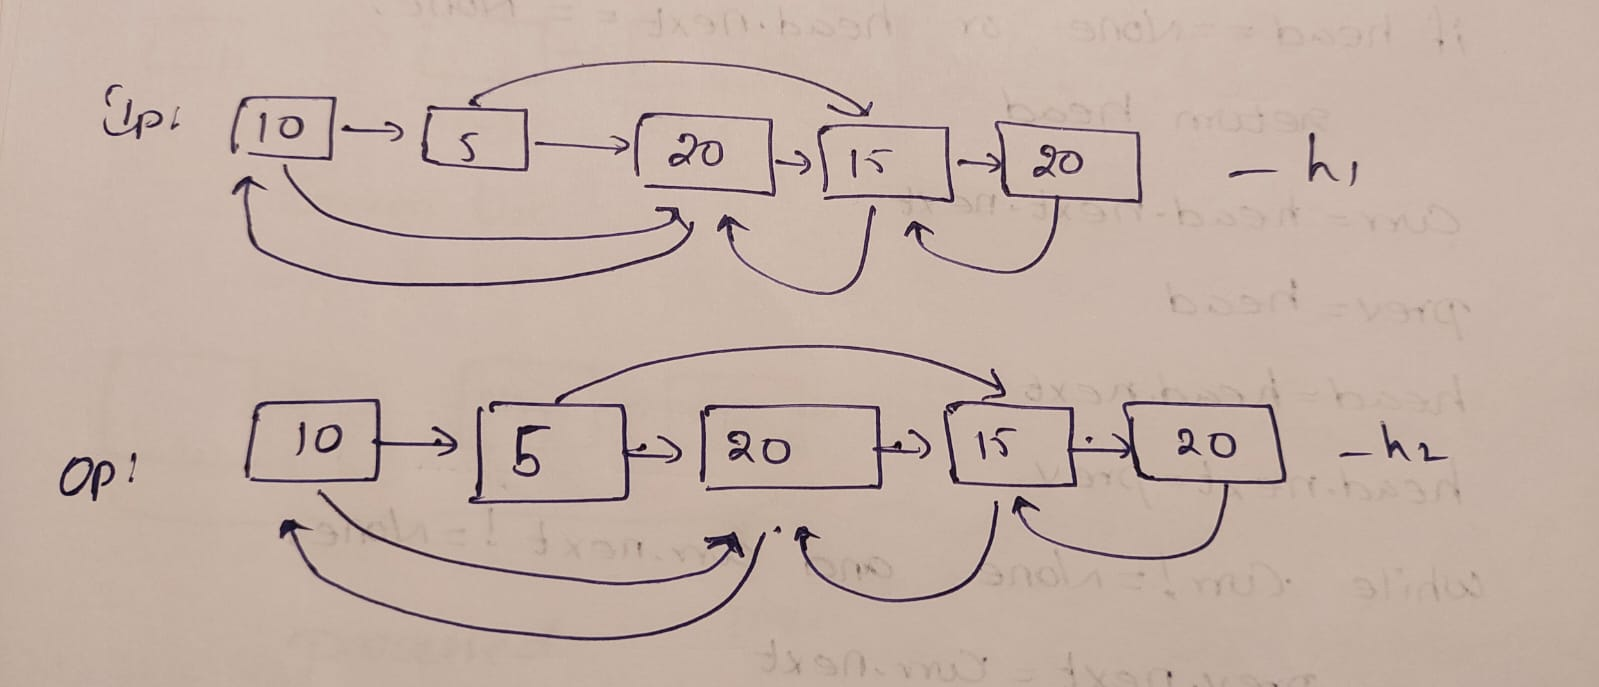

## Method 1 (Use Dictionary)

-> Create an empty Dictionary

-> Traverse through the list and do the following

      for everynode:
        d[curr] = Node(curr.data)

-> Traverse through the list again and do:

      d[curr].next = d[curr.next]
      d[curr].random = d[curr.random]

-> return d[h1]

In [6]:
# Implementation

class Node:
    def __init__(self, data=0, next=None, random=None):
        self.data = data
        self.next = next
        self.random = random

def clone(head):
    if head is None:
        return None

    d = {None: None}
    curr = head

    # Create a mapping from original nodes to their clones
    while curr is not None:
        d[curr] = Node(curr.data)
        curr = curr.next

    curr = head

    # Set next and random pointers for the cloned nodes
    while curr is not None:
        d[curr].next = d[curr.next]
        d[curr].random = d[curr.random]
        curr = curr.next

    return d[head]

def printList(head):
    curr = head
    while curr:
        random_data = curr.random.data if curr.random else None
        print(f"Node data: {curr.data}, Random points to: {random_data}")
        curr = curr.next

# Example usage:
# Creating a linked list with random pointers
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node3  # 1's random points to 3
node2.random = node1  # 2's random points to 1
node3.random = node4  # 3's random points to 4
node4.random = node2  # 4's random points to 2

print("Original list:")
printList(node1)

# Cloning the list
cloned_head = clone(node1)

print("\nCloned list:")
printList(cloned_head)


# Time Complexity : θ(n)
# Space Complexity : θ(n)

Original list:
Node data: 1, Random points to: 3
Node data: 2, Random points to: 1
Node data: 3, Random points to: 4
Node data: 4, Random points to: 2

Cloned list:
Node data: 1, Random points to: 3
Node data: 2, Random points to: 1
Node data: 3, Random points to: 4
Node data: 4, Random points to: 2


In [7]:
# Idea for Efficient Solution
'''
-> Create clone Nodes and Insert in given list at alternate postions

-> Connect the clone nodes

-> Separate the original and clone nodes

'''

'\n-> Create clone Nodes and Insert in given list at alternate postions \n\n-> Connect the clone nodes \n\n-> Separate the original and clone nodes \n\n'

In [8]:
# Efficient Solution

class Node:
    def __init__(self, data=0, next=None, random=None):
        self.data = data
        self.next = next
        self.random = random

def clone(h1):
  curr = h1

  while curr != None:
    next = curr.next
    curr.next = Node(curr.data)
    curr.next.next = next
    curr = next

  curr = h1

  while curr != None:
    curr.next.random = curr.random.next
    curr = curr.next.next

  h2 = h1.next
  clone = h2
  curr = h1

  while curr != None:
    curr.next = curr.next.next

    if clone.next == None:
      clone.next = None

    else:
      clone.next = clone.next.next

    clone = clone.next
    curr = curr.next

  return h2

def printList(head):
    curr = head
    while curr:
        random_data = curr.random.data if curr.random else None
        print(f"Node data: {curr.data}, Random points to: {random_data}")
        curr = curr.next

node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

node1.next = node2
node2.next = node3
node3.next = node4

node1.random = node3  # 1's random points to 3
node2.random = node1  # 2's random points to 1
node3.random = node4  # 3's random points to 4
node4.random = node2  # 4's random points to 2

print("Original list:")
printList(node1)

# Cloning the list
cloned_head = clone(node1)

print("\nCloned list:")
printList(cloned_head)

# Time Complexity : O(1)

Original list:
Node data: 1, Random points to: 3
Node data: 2, Random points to: 1
Node data: 3, Random points to: 4
Node data: 4, Random points to: 2

Cloned list:
Node data: 1, Random points to: 3
Node data: 2, Random points to: 1
Node data: 3, Random points to: 4
Node data: 4, Random points to: 2


# Merge Two Sorted LinkedLists

I/P : 10 -> 20 -> 30 ; 5 -> 25

O/P : 5 -> 10 -> 20 -> 25 -> 30


### Idea : Comparing both Linked List at Same

In [10]:
# Implementation

class Node:
    def __init__(self, data=0, next=None):
        self.data = data
        self.next = next

def sortedMerge(a, b):
  if a == None:
    return b

  if b == None:
    return a

  head, tail = None, None

  if a.data <= b.data:
    head = tail = a
    a = a.next

  else:
    head = tail = b
    b = b.next

  while a != None and b != None:
    if a.data <= b.data:
      tail.next = a
      tail = a
      a = a.next
    else:
      tail.next = b
      tail = b
      b = b.next

  if a == None:
    tail.next = b
  else:
    tail.next = a

  return head

def printList(head):
    curr = head
    while curr:
        print(curr.data, end=" -> ")
        curr = curr.next
    print("None")

list1 = Node(1)
list1.next = Node(3)
list1.next.next = Node(5)

list2 = Node(2)
list2.next = Node(4)
list2.next.next = Node(6)

print("List 1:")
printList(list1)

print("List 2:")
printList(list2)

merged_head = sortedMerge(list1, list2)

print()
print("Merged sorted list:")
printList(merged_head)


# Time Complexity : O(m + n)
# Space Complexity : O(1)

List 1:
1 -> 3 -> 5 -> None
List 2:
2 -> 4 -> 6 -> None

Merged sorted list:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> None


# Palindrome Linked List

I/P : R -> A -> D -> A -> R

O/P : yes

In [11]:
# Naive Solution

class Node:
    def __init__(self, data=0, next=None):
        self.data = data
        self.next = next

def isPalin(head):
  stack = []
  curr = head

  while curr != None:
    stack.append(curr.data)
    curr = curr.next

  curr = head

  while curr != None:
    if stack.pop() != curr.data:
      return False

    curr = curr.next

  return True

def printList(head):
    curr = head
    while curr:
        print(curr.data, end=" -> ")
        curr = curr.next
    print("None")

palindrome_list = Node(1)
palindrome_list.next = Node(2)
palindrome_list.next.next = Node(3)
palindrome_list.next.next.next = Node(2)
palindrome_list.next.next.next.next = Node(1)

print("Palindrome List:")
printList(palindrome_list)

result = isPalin(palindrome_list)
print(f"Is the list a palindrome? {result}")

non_palindrome_list = Node(1)
non_palindrome_list.next = Node(2)
non_palindrome_list.next.next = Node(3)
non_palindrome_list.next.next.next = Node(4)

print("\nNon-Palindrome List:")
printList(non_palindrome_list)

result = isPalin(non_palindrome_list)
print(f"Is the list a palindrome? {result}")

# Time Complexity : O(n)
# Space Complexity : O(n)

Palindrome List:
1 -> 2 -> 3 -> 2 -> 1 -> None
Is the list a palindrome? True

Non-Palindrome List:
1 -> 2 -> 3 -> 4 -> None
Is the list a palindrome? False


In [14]:
# Efficient Solution

class Node:
    def __init__(self, data=0, next=None):
        self.data = data
        self.next = next

def reverseList(head):
    prev = None
    curr = head

    while curr != None:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    return prev

def isPalin(head):
    if head is None:
        return True

    slow, fast = head, head

    while fast.next != None and fast.next.next != None:
        slow = slow.next
        fast = fast.next.next

    rev = reverseList(slow.next)
    curr = head

    while rev != None:
        if rev.data != curr.data:
            return False
        rev = rev.next
        curr = curr.next

    return True

def printList(head):
    curr = head
    while curr:
        print(curr.data, end=" -> ")
        curr = curr.next
    print("None")

palindrome_list = Node(1)
palindrome_list.next = Node(2)
palindrome_list.next.next = Node(3)
palindrome_list.next.next.next = Node(2)
palindrome_list.next.next.next.next = Node(1)

print("Palindrome List:")
printList(palindrome_list)
result = isPalin(palindrome_list)
print(f"Is the list a palindrome? {result}")

non_palindrome_list = Node(1)
non_palindrome_list.next = Node(2)
non_palindrome_list.next.next = Node(3)
non_palindrome_list.next.next.next = Node(4)

print("\nNon-Palindrome List:")
printList(non_palindrome_list)
result = isPalin(non_palindrome_list)
print(f"Is the list a palindrome? {result}")

# Time Complexity : O(n)
# Space Complexity : O(1)

Palindrome List:
1 -> 2 -> 3 -> 2 -> 1 -> None
Is the list a palindrome? True

Non-Palindrome List:
1 -> 2 -> 3 -> 4 -> None
Is the list a palindrome? False
